In [1]:
import ROOT as r
import matplotlib.pyplot as plt
import numpy as np
print(r.gROOT.GetVersion())

DATA_FILE = "/home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/output.root"
BUILD_LIB_PATH = "/home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib"

6.36.04


In [ ]:
import ROOT as r
import os

# Only load .so libraries in dependency order
libs_to_load = [
  "libanalysis_pipeline_core.so",
  "libunpacker_data_products_core.so",
  "libunpacker_data_products_nalu.so",
]

for lib in libs_to_load:
    path = os.path.join(BUILD_LIB_PATH, lib)
    if os.path.exists(path):
        print(f"Loading {path} ...")
        r.gSystem.Load(path)
    else:
        print(f"Skipping {path}, not found")

Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libanalysis_pipeline_core_rdict.pcm ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libunpacker_data_products_core_rdict.pcm ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libunpacker_data_products_nalu_rdict.pcm ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libanalysis_pipeline_core.rootmap ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libunpacker_data_products_core.rootmap ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libunpacker_data_products_nalu.rootmap ...
Loading /home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/build/lib/libanalysis_pipeline_core.so ...
Loading /home/jack/cpp_projects/an

In [3]:
import ROOT as r

# Even simpler - just use ROOT's built-in tools directly
def root_native_explore(file_path):
    """Use ROOT's native exploration tools"""
    f = r.TFile.Open(file_path)
    if not f or f.IsZombie():
        print(f"Error: Could not open file {file_path}")
        return
    
    print("=== File Overview ===")
    f.ls("-l")  # Long listing format
    
    print("\n=== Tree Details ===")
    for key in f.GetListOfKeys():
        obj = f.Get(key.GetName())
        if isinstance(obj, r.TTree):
            print(f"\n--- {obj.GetName()} ---")
            obj.Print("*")  # Print with full details
    
    f.Close()

root_native_explore(DATA_FILE)

=== File Overview ===

=== Tree Details ===

--- events ---
TFile**		/home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/output.root	
 TFile*		/home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/output.root	
******************************************************************************
*Tree    :events    : Nalu unpacked events                                   *
*Entries :     2559 : Total =        13022452 bytes  File  Size =    7356410 *
*        :          : Tree compression factor =   1.77                       *
******************************************************************************
*Branch  :event                                                              *
*Entries :     2559 : BranchElement (see below)                              *
*............................................................................*
*Br    0 :fUniqueID : UInt_t                                                 *
*Entries :     2559 : Total

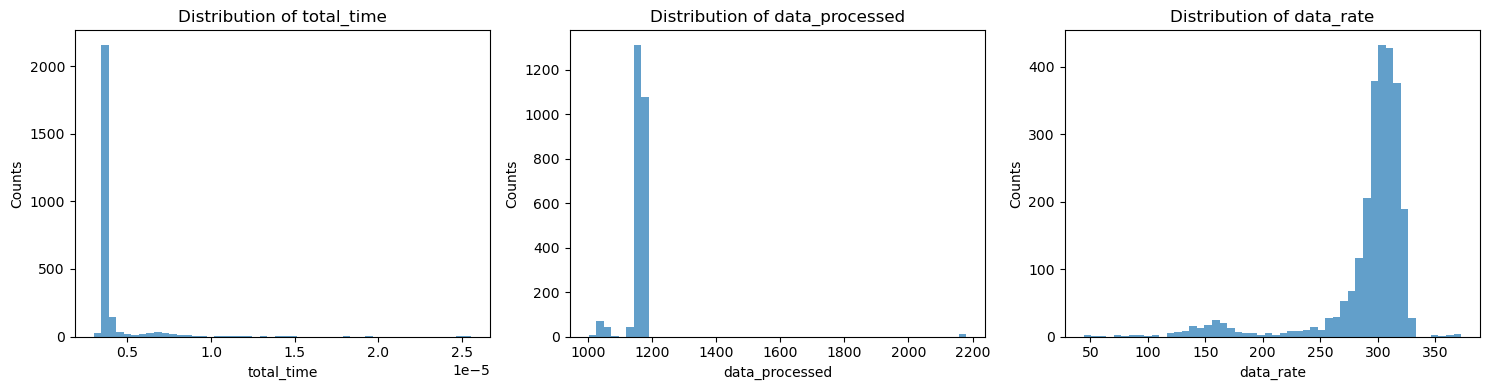

In [4]:
import ROOT
import matplotlib.pyplot as plt

DATA_FILE = "/home/jack/cpp_projects/analysis_pipeline_project/apps/midas_file_unpacker_app/output.root"
f = ROOT.TFile.Open(DATA_FILE)
tree = f.Get("events")

# Define the leaves to plot
leaves = ["time.total_time", "time.data_processed", "time.data_rate"]

plt.figure(figsize=(15,4))

for i, leaf in enumerate(leaves, 1):
    # Fill internal array
    tree.Draw(leaf, "", "goff")
    n = tree.GetSelectedRows()
    arr = tree.GetV1()
    
    # Convert to Python list
    data = [arr[j] for j in range(n)]
    
    # Plot histogram
    plt.subplot(1, len(leaves), i)
    plt.hist(data, bins=50, alpha=0.7)
    plt.xlabel(leaf.split('.')[-1])
    plt.ylabel("Counts")
    plt.title(f"Distribution of {leaf.split('.')[-1]}")

plt.tight_layout()
plt.show()


Total entries: 2559
Available branches:
  - event
  - times
  - packets
  - waveforms

=== Event 1 ===
Number of waveforms: 2
  Waveform 0: Channel 1, Length 256
  Waveform 1: Channel 0, Length 256
Number of packets: 16
  Packet 0: Channel 0, Trigger Time 3345300
  Packet 1: Channel 1, Trigger Time 3345301
  Packet 2: Channel 0, Trigger Time 3345300

=== Event 2 ===
Number of waveforms: 2
  Waveform 0: Channel 1, Length 256
  Waveform 1: Channel 0, Length 256
Number of packets: 16
  Packet 0: Channel 0, Trigger Time 3657813
  Packet 1: Channel 1, Trigger Time 3657813
  Packet 2: Channel 0, Trigger Time 3657813

=== Event 3 ===
Number of waveforms: 2
  Waveform 0: Channel 1, Length 256
  Waveform 1: Channel 0, Length 256
Number of packets: 16
  Packet 0: Channel 0, Trigger Time 3970326
  Packet 1: Channel 1, Trigger Time 3970326
  Packet 2: Channel 0, Trigger Time 3970326

=== Event 4 ===
Number of waveforms: 2
  Waveform 0: Channel 1, Length 256
  Waveform 1: Channel 0, Length 256
Numb

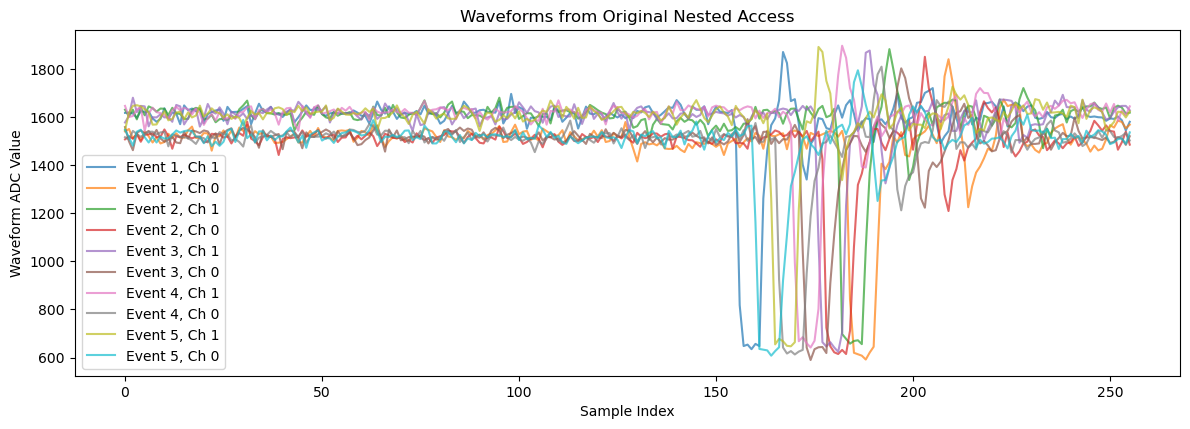


=== Testing Time Data ===
Time data accessed successfully
Collection cycle index: 2
Collection cycle timestamp: 1143035613778649
Event time: 7.164e-06


In [5]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file
f = ROOT.TFile.Open(DATA_FILE)
tree = f.Get("events")

print(f"Total entries: {tree.GetEntries()}")
print("Available branches:")
for branch in tree.GetListOfBranches():
    print(f"  - {branch.GetName()}")

# Test using the original nested access since it's working now
n_to_plot = 5
plt.figure(figsize=(12, 8))

for i, evt in enumerate(tree):
    if i >= n_to_plot:
        break
    
    print(f"\n=== Event {i+1} ===")
    
    # Access original nested waveforms
    waveforms = evt.event.waveforms.waveforms
    print(f"Number of waveforms: {len(waveforms)}")
    
    # Plot waveforms from original nested access
    for j, wf in enumerate(waveforms):
        channel = wf.channel_num
        trace = wf.trace
        
        # Convert to numpy array
        trace_np = np.array([trace[k] for k in range(len(trace))], dtype=np.int16)
        
        print(f"  Waveform {j}: Channel {channel}, Length {len(trace_np)}")
        
        plt.subplot(2, 1, 1)
        plt.plot(trace_np, alpha=0.7, label=f"Event {i+1}, Ch {channel}")
    
    # Access original nested packets
    packets = evt.event.packets.packets
    print(f"Number of packets: {len(packets)}")
    
    # Plot first few packet traces
    for j, pkt in enumerate(packets[:3]):  # Just first 3 packets
        channel = pkt.channel
        trace = pkt.trace
        # Also show some packet header info
        print(f"  Packet {j}: Channel {channel}, Trigger Time {pkt.trigger_time}")

plt.xlabel("Sample Index")
plt.ylabel("Waveform ADC Value")
plt.title("Waveforms from Original Nested Access")
plt.legend()

plt.tight_layout()
plt.show()

# Test accessing time data
print("\n=== Testing Time Data ===")
for i, evt in enumerate(tree):
    if i >= 1:  # Just test first event
        break
    
    time_data = evt.times
    print(f"Time data accessed successfully")
    print(f"Collection cycle index: {time_data.time.collection_cycle_index}")
    print(f"Collection cycle timestamp: {time_data.time.collection_cycle_timestamp_ns}")
    print(f"Event time: {time_data.time.event_time}")

f.Close()